In [1]:
#Data Source: https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset
import pandas as pd
import numpy as np
import seaborn as sns 
#!pip install seaborn
import matplotlib.pyplot as plt

df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
#Checking for missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df['rm']=df['rm'].fillna(df['rm'].mean())
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# 반응 변수는 medv (median value of owner occupied homes in thousands.)
X = df.drop(['medv'], axis = 1)
y = df['medv']

In [10]:
# 변수 타입을 모두 32bit float으로 바꾼다. (딥러닝에서 디폴트 포맷임)
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [12]:
import sagemaker
import boto3

#Create a SageMaker session
sagemaker_session = sagemaker.Session()
bucket = "jason-linlearner-housingdata"
prefix = "linear-learner" #prefix is a sub-folder/key within the S3 bucket

#Access SageMaker role created prior to session
#Need to pass role to training job
role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
arn:aws:iam::900521233259:role/service-role/AmazonSageMaker-ExecutionRole-20240327T170750


In [13]:
# Need to convert dataset to RecordIO format for Linear Learner to understand
import io 
import sagemaker.amazon.common as smac 
import os

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 

0

In [14]:
#Filename for training data we are uploading to S3 
key = 'linear-train-data'

#Upload training data to S3
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)
# 업로드한 폴더 위치
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://jason-linlearner-housingdata/linear-learner/train/linear-train-data


In [15]:
buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0)

#Sub-folder for test data
key = 'linear-test-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://jason-linlearner-housingdata/linear-learner/test/linear-test-data


In [16]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://jason-linlearner-housingdata/linear-learner/output


In [17]:
from sagemaker.amazon.amazon_estimator import image_uris
container = image_uris.retrieve('linear-learner', boto3.Session().region_name)

In [18]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#Different hyperparameters we can tune with Linear Learner in the link below
#https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
#We have 13 input features in X_train, our model problem is regression
linear.set_hyperparameters(feature_dim = 13,
                           predictor_type = 'regressor',
                           mini_batch_size = 20,
                           epochs = 5,
                           num_models = 10,
                           loss = 'absolute_loss')

#Pass in S3 training_data path variable we declared earlier
linear.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: linear-learner-2024-07-27-11-37-52-379


2024-07-27 11:37:52 Starting - Starting the training job...
2024-07-27 11:38:17 Starting - Preparing the instances for training...
2024-07-27 11:38:37 Downloading - Downloading input data...
2024-07-27 11:39:07 Downloading - Downloading the training image.........
2024-07-27 11:40:53 Training - Training image download completed. Training in progress.
2024-07-27 11:40:53 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/27/2024 11:40:47 INFO 139895807760192] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'i

In [19]:
linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-07-27-11-47-37-085
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-07-27-11-47-37-085
INFO:sagemaker:Creating endpoint with name linear-learner-2024-07-27-11-47-37-085


--------!

In [21]:
# from sagemaker.predictor import csv_serializer, json_deserializer
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

#need to make sure data is in correct format for deployed model
linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializer = JSONDeserializer()

In [22]:
result = linear_regressor.predict(X_test)
result

{'predictions': [{'score': 27.6195068359375},
  {'score': 37.374996185302734},
  {'score': 34.036415100097656},
  {'score': 38.02196502685547},
  {'score': 35.23229217529297},
  {'score': 32.277469635009766},
  {'score': 25.557031631469727},
  {'score': 27.944887161254883},
  {'score': 32.59526062011719},
  {'score': 20.361328125},
  {'score': 22.643383026123047},
  {'score': 10.742461204528809},
  {'score': 16.620140075683594},
  {'score': 18.97341537475586},
  {'score': 15.72938346862793},
  {'score': 18.302709579467773},
  {'score': 17.284954071044922},
  {'score': 7.546535491943359},
  {'score': 19.889938354492188},
  {'score': 16.268146514892578},
  {'score': 22.44206428527832},
  {'score': 19.52414894104004},
  {'score': 25.34992218017578},
  {'score': 17.961307525634766},
  {'score': 15.916417121887207},
  {'score': 19.515106201171875},
  {'score': 29.212677001953125},
  {'score': 25.257930755615234},
  {'score': 21.506864547729492},
  {'score': 9.299912452697754},
  {'score': 5

In [23]:
# json을 array 로 변경
predictions = np.array([res['score'] for res in result['predictions']])
predictions

array([27.61950684, 37.37499619, 34.0364151 , 38.02196503, 35.23229218,
       32.27746964, 25.55703163, 27.94488716, 32.59526062, 20.36132812,
       22.64338303, 10.7424612 , 16.62014008, 18.97341537, 15.72938347,
       18.30270958, 17.28495407,  7.54653549, 19.88993835, 16.26814651,
       22.44206429, 19.52414894, 25.34992218, 17.96130753, 15.91641712,
       19.5151062 , 29.212677  , 25.25793076, 21.50686455,  9.29991245,
        5.6177597 , 20.57806778, 22.64767456, 26.80307007, 17.50298309,
       37.5247612 , 28.42573166, 29.36032677, 23.19514275, 32.68796921,
       18.3621273 , 21.35786819, 15.39361572, 29.348629  , 16.22417259,
        3.306633  , 22.35299301, 35.98829651, 20.13988113, 18.03382492,
       33.31945801, 15.52650166, 36.22029114, 24.46116066, 15.61730003,
        6.14810371, 21.26169395, 21.18338203, 23.16493225, 16.68438721,
       16.69904709, 23.52974701, 30.12380219, 20.33602142, 23.90770531,
       30.99458122, 21.678545  , 14.37171745, 24.20939445, 15.27

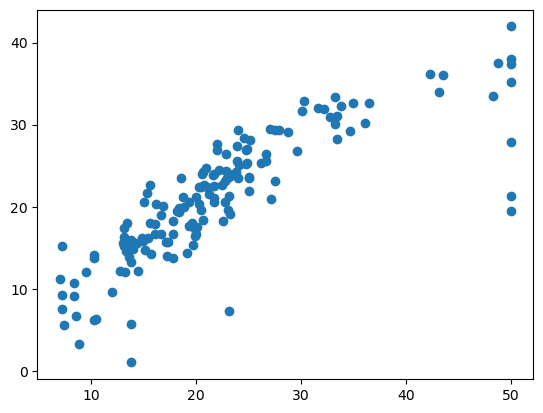

In [24]:
plt.scatter(y_test, predictions)

<Axes: ylabel='Count'>

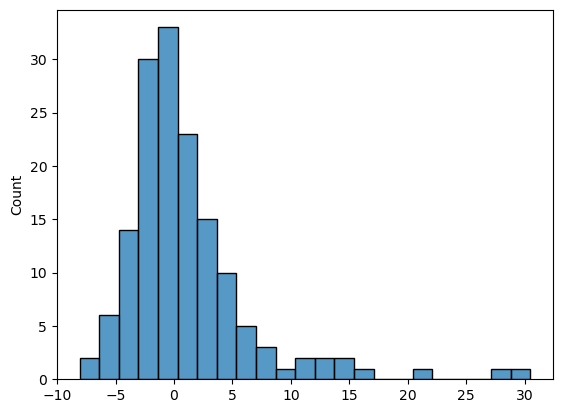

In [28]:
sns.histplot((y_test - predictions))
# plt.hist((y_test - predictions))

In [29]:
from sklearn import metrics 
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5.707753058355101

In [30]:
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-07-27-11-47-37-085
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-07-27-11-47-37-085
